Import packages here

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.io import imread

**Step 0. Moving the lab to your folder**

Duplicate this notebook (as you won't have write permission to this) to your Google Drive. 
This can be done by clicking on *File Menu - Save a copy in Drive*

Run to mount your google drives:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Your drive would be accessed as '/content/drive/MyDrive' for Colab. You may need to put your data and creating a 'results' folder somewhere in the drive. The 'results' folder could be used for storing the required outputs.   

In [ ]:
# example goes like:
path_data  = '/content/drive/MyDrive/MLSP/Lab5/data/'

**Implementing K-Means**


In [ ]:
def kmeans(image,k, max_iter):
  length=image.shape[0]
  width=image.shape[1]
  #print("Image Original Shape:",image.shape)
  image=image.reshape(image.shape[0]*image.shape[1],3)
  #print("Vectorized Image Shape:",image.shape)
  number_of_rows = image.shape[0]
  random_indices = np.random.choice(number_of_rows, size=k, replace=False)
  random_rgb_pixels = image[random_indices, :]
  pixel_assignment=np.zeros((image.shape[0],3))
  centroid_num=np.zeros(image.shape[0])
  for i in range(image.shape[0]): #Loop Over Image Pixels
    pixel=image[i,:] #Extract RGB value of pixel
    store_norms=np.zeros(random_rgb_pixels.shape[0]) #Length of number of centroids

    #Compute distance of pixel to each centroid
    for j in range(random_rgb_pixels.shape[0]):
      l1_norm=np.linalg.norm((pixel - random_rgb_pixels[j,:]), ord=1) #Compute l1 norm of each pixel to each centroid
      store_norms[j]=l1_norm
        
    #Find the minimum distance for this pixel
    pixel_assignment[i]=random_rgb_pixels[np.argmin(store_norms),:] #Store the RGB value of the pixel
    centroid_num[i]=np.argmin(store_norms) #Store the index of the centroid

  ###### Start For loops for reassignment of centroid and data #######
  for iter in range(max_iter):
    #Recompute the means
    centroids=np.zeros((k,3))
    for x in range(k):
      centroids[x,:]=np.mean(pixel_assignment[centroid_num==x,:],axis=0)

    #Loop Over Pixels for Pixel Reassignment
    pixel_assignment_new=np.zeros((image.shape[0],3))
    for pix in range(image.shape[0]):
      pixel=image[pix,:] #Extract RGB value of pixel
      store_norms=np.zeros(centroids.shape[0]) #Length of number of centroids

      #Compute distance of pixel to each centroid
      for f in range(centroids.shape[0]):
        l1_norm=np.linalg.norm((pixel - centroids[f,:]), ord=1) #Compute l1 norm of each pixel to each centroid
        store_norms[f]=l1_norm
        
      #Find the minimum distance for this pixel
      pixel_assignment_new[pix]=centroids[np.argmin(store_norms),:] #Store the RGB value of the pixel
      centroid_num[i]=np.argmin(store_norms) #Store the index of the centroid

    #Break Code if new pixel assignment is same as old pixel assignment
    if np.array_equal(pixel_assignment_new,pixel_assignment)== True:
      break;

    #Update the old pixel_assigment value as the current pixel assignment
    pixel_assignment=pixel_assignment_new

  #Segment the Image Based on Pixel Assigment and Output the Results
  image_segmented=(pixel_assignment.reshape(length,width,3)).astype(int)
  
  return centroids, image_segmented

***Validation on Test Images***

In [ ]:
#Load Data
elephants=imread(path_data+"elephant.jpg")
print(elephants.shape)
eiffel=imread(path_data+"eiffel.jpg")

(321, 481, 3)


Seg Image Shape: (270, 420, 3)
Seg Image Shape: (270, 420, 3)
Seg Image Shape: (270, 420, 3)


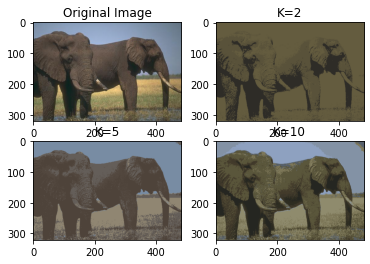

In [ ]:
#Create Data Subplots(Elephants)
plt.figure()
plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(elephants)
plt.subplot(2,2,2)
plt.title("K=2")
plt.imshow(kmeans(elephants,2,3)[1])
plt.subplot(2,2,3)
plt.title("K=5")
plt.imshow(kmeans(elephants,5,3)[1])
plt.subplot(2,2,4)
plt.title("K=10")
plt.imshow(kmeans(elephants,10,3)[1])

Seg Image Shape: (270, 420, 3)
Seg Image Shape: (270, 420, 3)
Seg Image Shape: (270, 420, 3)


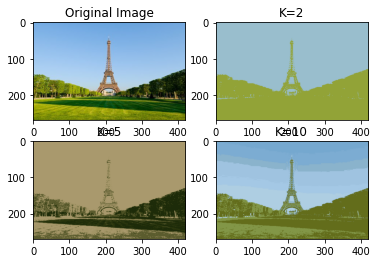

In [ ]:
#Create Data Subplots (Eiffel Tower)
plt.figure()
plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(eiffel)
plt.subplot(2,2,2)
plt.title("K=2")
plt.imshow(kmeans(eiffel,3,3)[1])
plt.subplot(2,2,3)
plt.title("K=5")
plt.imshow(kmeans(eiffel,5,3)[1])
plt.subplot(2,2,4)
plt.title("K=10")
plt.imshow(kmeans(eiffel,10,3)[1])

**Comparison with Existing K-Means**

Seg Image Shape: (270, 420, 3)
Seg Image Shape: (270, 420, 3)


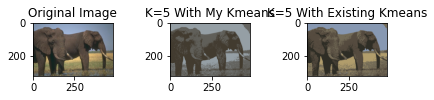

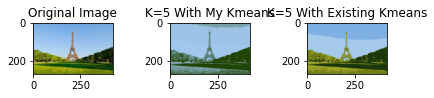

In [ ]:
from sklearn.cluster import KMeans as existing_kmeans

plt.figure()
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(elephants)
plt.subplot(1,3,2)
plt.title("K=5 With My Kmeans")
plt.imshow(kmeans(elephants,5,20)[1])
plt.subplot(1,3,3)
plt.title("K=5 With Existing Kmeans")
model=existing_kmeans(n_clusters=5,max_iter=3)
labels=model.fit_predict(elephants.reshape(elephants.shape[0]*elephants.shape[1],3))
color=model.cluster_centers_.round(0).astype(int)
img_seg=np.reshape(color[labels],(elephants.shape[0],elephants.shape[1],3))
plt.imshow(img_seg)
plt.tight_layout()


plt.figure()
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(eiffel)
plt.subplot(1,3,2)
plt.title("K=5 With My Kmeans")
plt.imshow(kmeans(eiffel,5,20)[1])
plt.subplot(1,3,3)
plt.title("K=5 With Existing Kmeans")
model=existing_kmeans(n_clusters=5,max_iter=3)
labels=model.fit_predict(eiffel.reshape(eiffel.shape[0]*eiffel.shape[1],3))
color=model.cluster_centers_.round(0).astype(int)
img_seg=np.reshape(color[labels],(eiffel.shape[0],eiffel.shape[1],3))
plt.imshow(img_seg)
plt.tight_layout()